<a href="https://colab.research.google.com/github/SH22Hwang/GNU_AugumentedIntelligenceLab/blob/main/seunghyeon/%EC%9C%BC%EB%9C%B8_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_LAB_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 으뜸 머신러닝
## LAB 6.1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression 

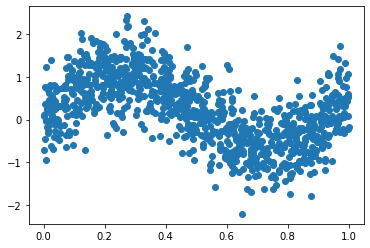

In [2]:
# 데이터 읽고, 그리기
data_loc = 'https://github.com/dknife/ML/raw/main/data/'
df = pd.read_csv(data_loc+'nonlinear.csv')

plt.scatter(df['x'], df['y'])

In [3]:
from sklearn.preprocessing import PolynomialFeatures

X = df['x'].to_numpy()
y = df['y'].to_numpy()

X = X.reshape(-1,1) # 2차원 벡터로 변환, -1은 데이터의 크기에 따라 적절한 값으로 맞추는 것
feature_cubic = PolynomialFeatures(degree=3) # 3차 다항식으로 변경하는 것
X_3 = feature_cubic.fit_transform(X) # 3차 다항식을 위한 입력으로 변경
X_3

array([[1.00000000e+00, 3.47942580e-02, 1.21064039e-03, 4.21233340e-05],
       [1.00000000e+00, 5.37594581e-02, 2.89007933e-03, 1.55369099e-04],
       [1.00000000e+00, 4.93225160e-02, 2.43271058e-03, 1.19987407e-04],
       ...,
       [1.00000000e+00, 4.14284197e-01, 1.71631396e-01, 7.11041752e-02],
       [1.00000000e+00, 5.75049972e-01, 3.30682470e-01, 1.90158945e-01],
       [1.00000000e+00, 4.93889763e-01, 2.43927098e-01, 1.20473097e-01]])

In [4]:
lin_model = LinearRegression()
domain = np.linspace(0, 1, 100).reshape(-1, 1)

In [5]:
lin_model.fit(X_3, y)
domain_3 = feature_cubic.fit_transform(domain)# 3차 다항식을 위한 입력으로 변경
predictions = lin_model.predict(domain_3)

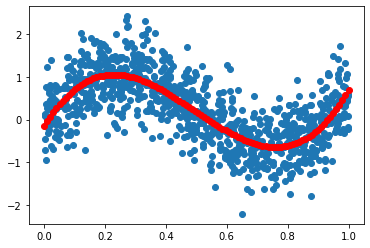

In [6]:
plt.scatter(df['x'], df['y'])
plt.scatter(domain, predictions, color='r')

## LAB 6.2

In [8]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
# X, y = iris.data[:, :2], iris.target # 꽃받침 데이터
X, y = iris.data, iris.target # 모든 데이터
# dec_tree = DecisionTreeClassifier(max_depth = 3)
dec_tree = DecisionTreeClassifier(max_depth = 3, criterion='entropy')
dec_tree.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [10]:
from sklearn.tree import export_graphviz
export_graphviz(
    dec_tree,
    out_file=("./dec_tree_for_iris.dot"),
    # feature_names = iris.feature_names[:2],
    feature_names = iris.feature_names,
)

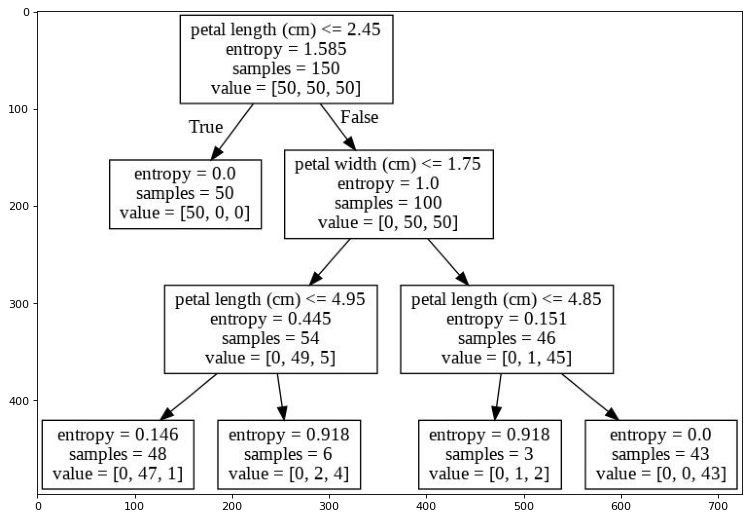

In [11]:
!dot -Tjpg dec_tree_for_iris.dot -o dec_tree_for_iris.jpg

dec_tree_img = plt.imread('./dec_tree_for_iris.jpg')
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(dec_tree_img)